# Introduction
Hello, everyone! This is team Optimal Anthill. You all know why we're here. We're determining the 'best' neighborhood in Pittsburgh. We began just by looking at what datasets were out there, and we thought about how valuable the information could potentially be. And we actually found datasets we liked before we had even thought of a metric because our data sets were very straightforward and representative of neighborhood aspects each of us deem important. So our search continued until we found a 2014 census report. It didn't exactly have the most up-to-date data, but it did contain data that was valuable to us.
# The Metric
Our metrics is currently an amalgamation of each of our three individual metrics. These are Income, Education, and Race. We used different methods of determining which are the top 10 neighborhood in each category. Then, we gave 10 points to the number 1 neighborhood of each category, 9 points to the number 2 neighborhood, 8 points to number 3, and so on. The neighborhood that has the most points overall is declared the best neighborhood in Pittsburgh
# The Best Neighborhood
We'll start with John's category: Income. First, I calculated the estimated percent of citizens in each neighborhood with an income. This was insufficient, as this led to a neighborhood with 8 people being the best neighborhood, and that was unreasonable. So instead, I subtracted the margin of error from the total to get a better estimation of what percentage of the population had an income. Which you can see below.

In [193]:
import pandas as pd
data = pd.read_csv("https://data.wprdc.org/dataset/c6265ffb-c86e-4a2c-870b-1aaa0772c449/resource/14abb000-d066-4728-8ffa-227883d6c331/download/wage-or-salary-income-in-the-past-12-months-for-households.csv",
                  index_col='Id')
percs = [0.0]*len(data.index)
i = 0
#iterate through the rows
for item in data.iterrows():
    try:#attempt to do the division
        percent = item[1][3]/item[1][1]
    except:#any errors will result in an assumed 0%
        percent = 0.0
    percs[i]=percent
    i+=1
data['Percent with Income'] = percs
data['Adjusted Percent with Income']=data['Estimate; Total: - With wage or salary income'].sub(data['Margin of Error; Total: - With wage or salary income']).div(data['Estimate; Total:'])
data =data.sort_values('Adjusted Percent with Income', ascending = False)
data.head(10)

,Neighborhood,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - With wage or salary income,Margin of Error; Total: - With wage or salary income,Estimate; Total: - No wage or salary income,Margin of Error; Total: - No wage or salary income,Percent with Income,Adjusted Percent with Income
Id,,,,,,,,,
32,Fairywood,457.0,85.000000,447.0,83.000000,10.0,16.000000,0.978118,0.796499
20,Central Oakland,1918.0,152.676128,1658.0,157.946193,260.0,87.028731,0.864442,0.782093
34,Friendship,1077.0,125.924581,972.0,142.688472,105.0,76.157731,0.902507,0.770020
10,Bloomfield,4640.0,215.506380,3789.0,223.385317,851.0,117.388245,0.816595,0.768451
82,Summer Hill,524.0,15.000000,439.0,38.000000,85.0,33.000000,0.837786,0.765267
64,Point Breeze,2348.0,149.080515,1921.0,138.054337,427.0,107.433700,0.818143,0.759347
69,Shadyside,7462.0,368.263493,6032.0,371.414862,1430.0,228.803409,0.808362,0.758588
73,South Side Flats,3452.0,285.392712,2853.0,284.534708,599.0,123.737626,0.826477,0.744051
90,Westwood,1514.0,118.827606,1255.0,130.873985,259.0,79.195959,0.828930,0.742487


At this point, it's fairly easy to see which neighborhoods are best, but to make it even easier:

(0.6, 1.0)

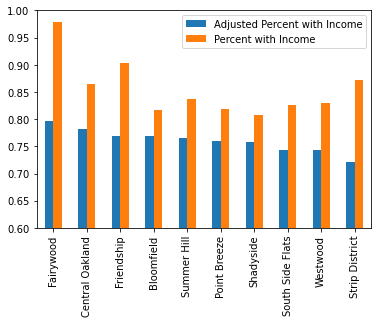

In [194]:
top10=pd.DataFrame(columns = ['Adjusted Percent with Income','Percent with Income'], index =['Fairywood','Central Oakland','Friendship','Bloomfield','Summer Hill','Point Breeze','Shadyside','South Side Flats','Westwood','Strip District',    ])
top10['Adjusted Percent with Income'] = [0.796499,0.782093,0.770020,0.768541,0.765267,0.759347,0.758588,0.744051,0.742487,0.721757]
top10['Percent with Income']= [0.978118,0.864442,0.902507,0.816595,0.837786,0.818143,0.808362,0.826477,0.828930,0.872385]
top10.plot(kind = 'bar').set_ylim(0.6,1.0)

This graph shows the difference between the adjusted percent with income and the raw percent with income. The raw percentages were less consistent than the adjusted percentages, and these were the top 10. The other neighborhoods showed even more scattered data. You can see that the difference when you account for margin of error is much less than just the flat estimates. And that seems much more reasonable to me. Every neighborhood needs a steady flow of income in order to grow and adapt to the needs of its people, and I think the best neighborhood should have the most income. It's representative of how industrious the citizens are, and I place high value on hard work and keeping a job. Furthermore, keeping a job shows responsibility and maturity which I also place high value on.

In [195]:
points = {}
i=10
for x in top10.index:
    if x in points:
        points[x]+=i
    else:
        points[x]=i
    i-=1
display(points)

{'Fairywood': 10,
 'Central Oakland': 9,
 'Friendship': 8,
 'Bloomfield': 7,
 'Summer Hill': 6,
 'Point Breeze': 5,
 'Shadyside': 4,
 'South Side Flats': 3,
 'Westwood': 2,
 'Strip District': 1}

This code snippet adds those point values to a dictionary called points, and is the beginning of our metric. Next we have Joseph to explain his rankings for education.

At least, we would if he would respond to my messages. So I, John, will explain for him, taking all necessary code straight from his notebook.

In [196]:

data = pd.read_csv("https://data.wprdc.org/dataset/c6265ffb-c86e-4a2c-870b-1aaa0772c449/resource/755c09dc-be92-4787-84a6-080d84345979/download/educational-attainment-for-the-population-25-years-and-over.csv", index_col='Id')
most_ed = data.drop(data.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14, 15, 16, 17, 18, 19, 20,21, 22, 23, 24, 25, 26,27, 28, 29, 30,31,32, 33, 34, 35, 36, 37, 38,39, 40,41, 42,43, 44,45,46 ,47 ,48 ,49,50]], axis = 1)
most_ed = most_ed.drop([22]) #Drop index 22 since there are 0 people educated there.
most_ed['Total_Educated'] = data['Estimate; Total:']
most_ed["Masters_Degree"] = data["Estimate; Total: - Master's degree"]
most_ed["Doctorates_Degree"] = data["Estimate; Total: - Doctorate degree"]
most_ed['Masters_Degree'] = most_ed.apply(lambda row: (row.Masters_Degree / row.Total_Educated) * 100, axis =1)
most_ed['Doctorates_Degree'] = most_ed.apply(lambda row: (row.Doctorates_Degree / row.Total_Educated) * 100 , axis =1)

most_ed = most_ed.sort_values(['Doctorates_Degree', 'Masters_Degree'], ascending=[False, False]).head(10)
most_ed

,Neighborhood,Total_Educated,Masters_Degree,Doctorates_Degree
Id,,,,
77,Squirrel Hill North,5494.0,24.699672,14.743356
64,Point Breeze,4022.0,23.197414,13.426156
69,Shadyside,9414.0,24.304228,12.608880
78,Squirrel Hill South,11164.0,23.728054,12.459692
65,Point Breeze North,1527.0,14.800262,12.442698
67,Regent Square,774.0,24.418605,10.723514
57,North Oakland,2937.0,26.081035,9.159006
34,Friendship,1447.0,24.879060,8.845888
20,Central Oakland,1005.0,16.218905,7.761194


First, Joey reads in his data and drops any excess columns he didn't want, leaving what appear to be the most important factors for determining the most educated neighborhood: total educated, total with master's degrees, and total with doctorate degrees. Then he takes the percentages for masters degrees and doctorate degrees out of the total number of citizens with education in each neighborhood. He then sorts the data by the percentage with doctorate degrees, and then by master's degrees in case of ties (which there were none). I should point out that he chose to focus on Master's and Doctorate degrees because they represent the highest level of education. 

Though I would do things differently. I would award each type of degree 
* High School
* GED
* College less than 1 year
* College 1 or more years but no degree
* Associate's
* Bachelor's
* Master's, Professional School
* Doctorate 

weighted values as listed in the 'weights' list. Next I would multiply each column in the dataset by its appropriate weight, and add them all together, then sort by that finalized metric, which I have done below:

In [197]:
data = pd.read_csv("https://data.wprdc.org/dataset/c6265ffb-c86e-4a2c-870b-1aaa0772c449/resource/755c09dc-be92-4787-84a6-080d84345979/download/educational-attainment-for-the-population-25-years-and-over.csv")

#removing excess and margins of error
#--------------------------------------------------------------
weighted_data = data.drop(data.columns[range(1,34)], axis=1)
weighted_data = weighted_data.drop(weighted_data.columns[range(2,19,2)], axis=1)
#--------------------------------------------------------------
weights = [1.0,1.25,1.5,1.75,2.0,4.0,6.0,8.0,8.0]#list of weights for columns

i=0
for column in weighted_data.columns[1:]:
    weighted_data[column]*=weights[i]
    i+=1

data['Metric'] = weighted_data.sum(axis=1)
data = data.sort_values(by=['Metric'], ascending=False)
JohnTop10 =data.head(10)
display(JohnTop10)

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - No schooling completed,Margin of Error; Total: - No schooling completed,Estimate; Total: - Nursery school,Margin of Error; Total: - Nursery school,Estimate; Total: - Kindergarten,Margin of Error; Total: - Kindergarten,...,Margin of Error; Total: - Associate's degree,Estimate; Total: - Bachelor's degree,Margin of Error; Total: - Bachelor's degree,Estimate; Total: - Master's degree,Margin of Error; Total: - Master's degree,Estimate; Total: - Professional school degree,Margin of Error; Total: - Professional school degree,Estimate; Total: - Doctorate degree,Margin of Error; Total: - Doctorate degree,Metric
77,Squirrel Hill South,78,11164.0,636.661606,9.0,36.124784,0.0,36.055513,0.0,36.055513,...,178.913387,2941.0,347.732656,2649.0,313.998408,954.0,188.751159,1391.0,248.660411,50602.75
68,Shadyside,69,9414.0,684.999270,75.0,64.451532,0.0,37.416574,1.0,36.110940,...,129.216872,3116.0,451.571700,2288.0,307.315798,936.0,176.802149,1187.0,243.380361,45588.75
76,Squirrel Hill North,77,5494.0,363.056469,18.0,38.078866,0.0,31.622777,0.0,31.622777,...,70.164093,1346.0,192.265442,1357.0,180.977899,958.0,180.748444,810.0,157.225952,29006.25
13,Brookline,14,9770.0,621.529565,45.0,45.055521,9.0,39.949969,0.0,38.729833,...,324.963075,1672.0,265.825130,669.0,162.203576,117.0,76.785415,85.0,74.659226,21325.00
9,Bloomfield,10,6603.0,431.270217,42.0,32.863353,0.0,31.622777,0.0,31.622777,...,134.469327,1704.0,252.713276,1072.0,185.429232,210.0,79.113842,217.0,78.460181,20889.00
63,Point Breeze,64,4022.0,264.673384,0.0,26.457513,0.0,26.457513,0.0,26.457513,...,60.588778,1139.0,160.368326,933.0,139.111466,431.0,101.360742,540.0,118.574871,19261.75
36,Greenfield,37,5691.0,478.926926,41.0,49.203658,0.0,30.000000,0.0,30.000000,...,120.203993,1303.0,273.952551,978.0,224.156196,147.0,80.299440,246.0,118.139748,17933.25
39,Highland Park,40,4674.0,481.203699,12.0,29.325757,0.0,28.284271,0.0,28.284271,...,146.928554,1233.0,235.758351,836.0,186.617255,317.0,134.443297,346.0,113.291659,17838.50
53,Mount Washington,54,6467.0,428.903252,47.0,35.860842,0.0,30.000000,0.0,30.000000,...,162.969322,1718.0,279.521019,670.0,155.727326,139.0,71.267103,130.0,60.506198,17723.50
72,South Side Flats,73,4143.0,420.511593,20.0,29.681644,0.0,24.494897,0.0,24.494897,...,136.554019,1185.0,208.160995,559.0,139.631658,303.0,110.521491,148.0,73.498299,14067.25


This metric I think is more accurate for education because it accounts for more kinds of education, and weights them based on how long a person would spend obtaining that education and how valuable that would be. I chose high school as a baseline because most jobs require a high school education or better.

In [198]:
i=10
for x, y in JohnTop10.iterrows():
    if y['Neighborhood'] in points:
        points[y['Neighborhood']]+=i
    else:
        points[y['Neighborhood']]=i
    i-=1
display(points)

{'Fairywood': 10,
 'Central Oakland': 9,
 'Friendship': 8,
 'Bloomfield': 13,
 'Summer Hill': 6,
 'Point Breeze': 10,
 'Shadyside': 13,
 'South Side Flats': 4,
 'Westwood': 2,
 'Strip District': 1,
 'Squirrel Hill South': 10,
 'Squirrel Hill North': 8,
 'Brookline': 7,
 'Greenfield': 4,
 'Highland Park': 3,
 'Mount Washington': 2}

Now we have points totaled for the first 2 parts of the metric and Jay will explain her part of the metric on diversity

This code block was taken directly from Jay's notebook since she's also not responding to my messages, so I will do my best to explain it. 

In [199]:
#FINAL CODE BLOCK

data = pd.read_csv("race.csv", index_col = "Id")
df = pd.DataFrame(data)

# 1. Look at members who are white alone compared to total sample
stripped_df = df[["Neighborhood", "Estimate; Total:", "Estimate; Total: - White alone"]]
                    
# 2. Calculate percent of people who identify as White alone within total population of a neighborhood and compare across the board

for line in range(len(stripped_df)):
    prc = ((100*stripped_df.iloc[line,2])/stripped_df.iloc[line,1])
    if prc > 30 and prc < 45: # 3. pulls out neighboods with 30% > percentages > 45% to represent most diverse ones
        print ("Neighborhood: " + stripped_df.iloc[line,0])
        print ("White-Identifying Residents: " + str(prc) + "%")
        print ()
        
#4. The winner pf best neighborhood from a diversity lens would be Terrace Village because it is the most median value. The neighborhoods that fit this metric for diversity criteria will be cross referenced with the top winners from the economic and educational metrics.
#Knoxville, Perry South, St. Clair, Terrace Village, West Oakland

Neighborhood: Knoxville
White-Identifying Residents: 33.47639484978541%

Neighborhood: Perry South
White-Identifying Residents: 30.234578627280627%

Neighborhood: St. Clair
White-Identifying Residents: 38.205980066445186%

Neighborhood: Terrace Village
White-Identifying Residents: 38.198124745209945%

Neighborhood: West Oakland
White-Identifying Residents: 36.99487763232783%



<ipython-input-199-aa08122d041d>:12: RuntimeWarning: invalid value encountered in double_scalars
  prc = ((100*stripped_df.iloc[line,2])/stripped_df.iloc[line,1])


First she reads in her dataset, strips it down to the neighborhoods, the population in each neighborhood, and the the total number of people identifying solely 'White'. She then simply output the neighborhoods that contained a percentage of white-identifying residents between 30% and 45%. This leads to her only 5 suitable neighoods being Knoxville, Perry South, St. Clair, Terrace Village, and West Oakland. I will give each of these 3 points, and her declared winner 'Terrace Village' an additional 3 points

In [200]:
for x in ['Knoxville', 'Perry South', 'St. Clair', 'Terrace Village', 'West Oakland']:
    if x in points:
        points[x]+=3 
    else:
        points[x]=3
points['Terrace Village']+=3
display(points)

{'Fairywood': 10,
 'Central Oakland': 9,
 'Friendship': 8,
 'Bloomfield': 13,
 'Summer Hill': 6,
 'Point Breeze': 10,
 'Shadyside': 13,
 'South Side Flats': 4,
 'Westwood': 2,
 'Strip District': 1,
 'Squirrel Hill South': 10,
 'Squirrel Hill North': 8,
 'Brookline': 7,
 'Greenfield': 4,
 'Highland Park': 3,
 'Mount Washington': 2,
 'Knoxville': 3,
 'Perry South': 3,
 'St. Clair': 3,
 'Terrace Village': 6,
 'West Oakland': 3}

# Conclusion

It's clear to see that we have a tie between Bloomfield and Shadyside, both of which got 13 points. I'm completely for this since I'm actually going to be renting an apartment in Shadyside. I've heard a lot of good things about Shadyside from other college students as well as my family. And I'm glad to see it got good points for education and income. It makes a lot of sense, seeing as its a popular spot for college students. I figure that once college students graduate, some of them will stay in that area for a while to build up finances before moving elsewhere. This would also explain why no single neighborhood took a huge lead over the others. Since we chose such a broad metric, you wouldn't expect any individual neighborhood to excell in every aspect. 

Thank you for your time!

John Pepling